# Acheiving a higher accuracy score using data augmentation technique

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint

plt.style.use('classic')

In [3]:
abspath = os.path.abspath('./')
train_dir = os.path.join(abspath, 'data_dir/train')
test_dir = os.path.join(abspath, 'data_dir/test')
valid_dir = os.path.join(abspath, 'data_dir/valid')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


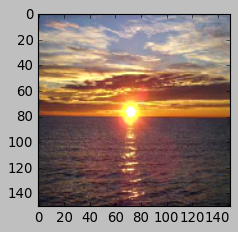

In [4]:
# Viewing a random training image

img_file = os.path.join(train_dir, 'sunrise/sunrise12.jpg')

img = image.load_img(img_file, target_size=(150,150))
img = image.img_to_array(img)
img /= 225

plt.figure(figsize=(5,3))
plt.imshow(img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


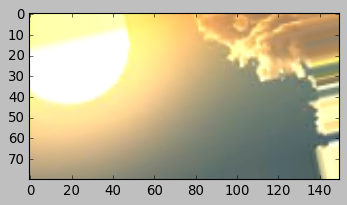

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


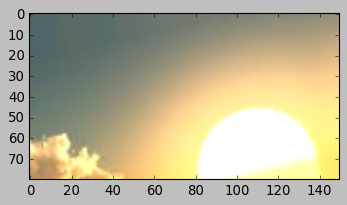

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


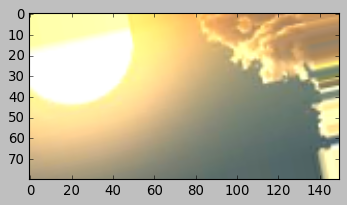

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


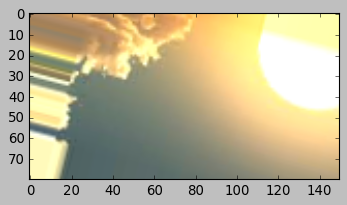

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


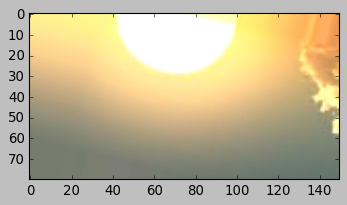

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


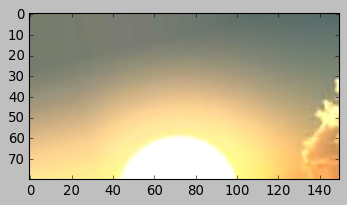

In [5]:
""" Experimenting with data augmentation on a random training data
"""

img_file = os.path.join(train_dir, 'sunrise/sunrise50.jpg')

test_img = image.load_img(img_file, target_size=(150,150))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img, axis=0)

img_gen = ImageDataGenerator(rescale=1./225, horizontal_flip=True,
                            rotation_range=20, vertical_flip=True,
                             width_shift_range=0.2,height_shift_range=0.1,
                           ).flow(test_img[:100, :80, :], batch_size=1)

# plotting only a small part of the augmented image
total = 0
for img in img_gen:
    plt.figure(figsize=(5,3))
    plt.imshow(img[0])
    total += 1
    plt.show()
    if total == 6: break

In [6]:
# augmenting the training data and rescaling the testand validation data

train_gen = ImageDataGenerator(rescale=1./225, horizontal_flip=True,
                            rotation_range=20, vertical_flip=True,
                             width_shift_range=0.2,height_shift_range=0.1,
                           )
test_gen = ImageDataGenerator(rescale=1./225)

train_data = train_gen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20)
valid_data = test_gen.flow_from_directory(valid_dir, target_size=(150, 150), batch_size=10)
test_data = test_gen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=10)

Found 899 images belonging to 4 classes.
Found 114 images belonging to 4 classes.
Found 111 images belonging to 4 classes.


In [7]:
""" Building a similar model to the first classification model"""

model = models.Sequential()

# layer 1
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu',
                       input_shape=(150, 150, 3)))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# layer 2
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3)))

# layer 3
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3)))

# layer 4
model.add(layers.Flatten())
model.add(layers.Dense(715, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 128)       7

In [8]:
checkpoint = ModelCheckpoint('WeatherWithAugmentation.model.hdf5', verbose=1, save_best_only=True)

model.compile(optimizer=RMSprop(lr=1e-4), loss=categorical_crossentropy,  metrics=['accuracy'])

history = model.fit_generator(train_data, steps_per_epoch=10, 
                              epochs=20, callbacks=checkpoint,
                              validation_data=valid_data, validation_steps=10)

/home/mosioatunya/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
10/10 [==============================] - 28s 3s/step - loss: 1.3577 - accuracy: 0.2890 - val_loss: 1.2215 - val_accuracy: 0.4500

Epoch 00001: val_loss improved from inf to 1.22153, saving model to WeatherWithAugmentation.model.hdf5
Epoch 2/20
10/10 [==============================] - 27s 3s/step - loss: 1.1434 - accuracy: 0.5211 - val_loss: 0.7297 - val_accuracy: 0.6200

Epoch 00002: val_loss improved from 1.22153 to 0.72972, saving model to WeatherWithAugmentation.model.hdf5
Epoch 3/20
10/10 [==============================] - 27s 3s/step - loss: 0.8943 - accuracy: 0.6377 - val_loss: 0.5987 - val_accuracy: 0.7900

Epoch 00003: val_loss improved from 0.72972 to 0.59871, saving model to WeatherWithAugmentation.model.hdf5
Epoch 4/20
10/10 [==============================] - 26s 3s/step - loss: 0.7873 - accuracy: 0.6762 - val_loss: 0.5839 - val_accuracy: 0.7500

Epoch 00004: val_loss improved from 0.59871 to 0.58385, saving model to WeatherWithAugmentation.model.hdf5
Epoch 5/20
1

Best Values

- loss: 0.5873
- accuracy: 0.7540
- val_loss: 0.3964
- val_accuracy: 0.8400

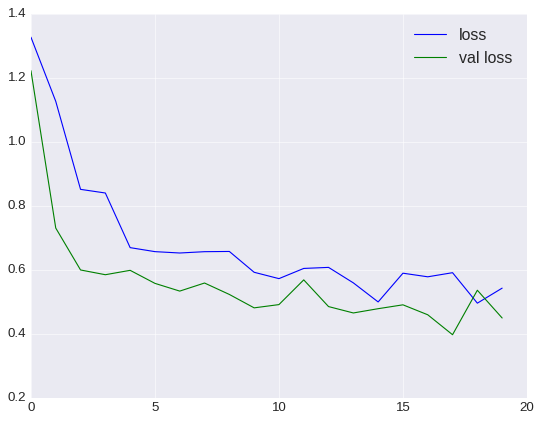

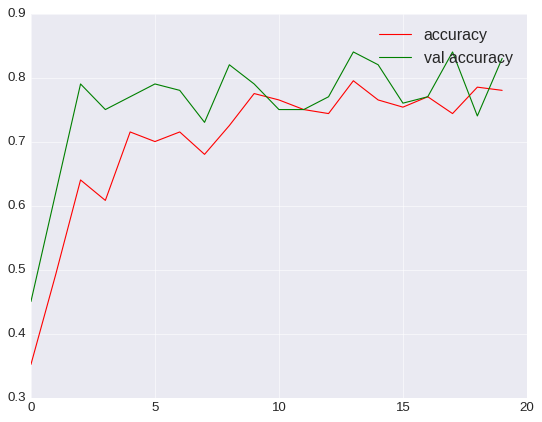

In [9]:
plt.style.use('seaborn-darkgrid')
epochs = len(history.history['loss'])

loss = history.history['loss']
acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

plt.plot(loss, label='loss')
plt.plot(val_loss, 'g', label='val loss')
plt.legend()

plt.figure()
plt.plot(acc, 'r', label='accuracy')
plt.plot(val_acc, 'g', label='val accuracy')
plt.legend()
plt.show()

In [10]:
score = model.evaluate_generator(test_data, callbacks=checkpoint)
print(f'Loss : {score[0]}\nAccuracy : {score[1]}')

/home/mosioatunya/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Loss : 0.41345998644828796
Accuracy : 0.8828828930854797


In [33]:
def prediction(file_image):
    img = image.load_img(file_image, target_size=(150, 150))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 225
    
    prediction = model.predict(img, callbacks=checkpoint, batch_size=32, steps=1)
    class_pred = np.argmax(prediction)
    name = ''.join([key for key, value in train_data.class_indices.items() if class_pred == value])
    
    pred = prediction[0, class_pred]*100
    
    print(f'Prediction : {name}')
    print(f'Accuracy : {pred}')

image_file = os.path.join('data_dir/train/cloud/', 'cloudy300.jpg')
prediction(image_file)

Prediction : cloud
Accuracy : 46.40263915061951
